<a href="https://colab.research.google.com/github/Pavithratrdev/Alphabet-Recognition/blob/main/ClassRoom_Cancer_Dataset_XGBoost_Classification_Original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
data = pd.read_csv("mobile_train.csv")

In [ ]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
X = data.drop(["price_range"],axis=1)
y = data['price_range']

In [ ]:
y.unique()

array([1, 2, 3, 0])

In [ ]:
X.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [ ]:
X.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000


## Normalize

In [ ]:
X = (X - np.min(X))/(np.max(X) - np.min(X))

In [ ]:
X.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.492664,0.4950,0.408900,0.509500,0.226816,0.521500,0.484621,0.446389,0.502075,0.502929,0.495825,0.329137,0.501679,0.499255,0.521893,0.320389,0.500611,0.761500,0.503000,0.507000
std,0.293533,0.5001,0.326402,0.500035,0.228497,0.499662,0.292673,0.320462,0.294997,0.326834,0.303216,0.226419,0.288518,0.289880,0.300946,0.242022,0.303553,0.426273,0.500116,0.500076
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.234302,0.0000,0.080000,0.000000,0.052632,0.000000,0.225806,0.111111,0.241667,0.285714,0.250000,0.144260,0.250167,0.254276,0.285714,0.111111,0.222222,1.000000,0.000000,0.000000
50%,0.484302,0.0000,0.400000,1.000000,0.157895,1.000000,0.483871,0.444444,0.508333,0.428571,0.500000,0.287755,0.498665,0.505211,0.500000,0.277778,0.500000,1.000000,1.000000,1.000000
75%,0.744322,1.0000,0.680000,1.000000,0.368421,1.000000,0.741935,0.777778,0.750000,0.857143,0.750000,0.483291,0.756342,0.750534,0.785714,0.500000,0.777778,1.000000,1.000000,1.000000
max,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Train Test Split

In [ ]:
train_test_split?

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
model = XGBClassifier()

In [ ]:
XGBClassifier?

In [ ]:
model.fit(X_train, Y_train, eval_metric=['merror', 'auc'], verbose=3)

XGBClassifier(objective='multi:softprob')

In [ ]:
model.score(X_test, Y_test)

0.91

In [ ]:
model = XGBClassifier(objective="multi:softmax")
xgb_param = model.get_xgb_params()
xgb_param['num_class'] = 4
xgb_param

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'nthread': 1,
 'num_class': 4,
 'objective': 'multi:softmax',
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 0,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
xgtrain = xgb.DMatrix(X_train, label=Y_train)
xgtest = xgb.DMatrix(X_test, label=Y_test)

In [ ]:
#model.get_params()
cv_folds=5
early_stopping_rounds=50

In [ ]:
cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=model.get_params()['n_estimators'], nfold=cv_folds,
                      early_stopping_rounds=early_stopping_rounds)

In [ ]:
cvresult

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.031868,0.005918,0.090110,0.033620
1,0.029670,0.004726,0.087912,0.033331
2,0.025824,0.007079,0.068132,0.038945
3,0.024176,0.007653,0.079121,0.037684
4,0.025275,0.008038,0.083516,0.035845
...,...,...,...,...
95,0.000000,0.000000,0.041758,0.021308
96,0.000000,0.000000,0.041758,0.021308
97,0.000000,0.000000,0.041758,0.021308
98,0.000000,0.000000,0.041758,0.021308


In [ ]:
cvresult.shape

(100, 4)

In [ ]:
model.set_params(n_estimators=cvresult.shape[0])

XGBClassifier(objective='multi:softmax')

In [ ]:
model.fit(X_train, Y_train, eval_metric=['merror', 'auc'], verbose=True)

AttributeError: ignored

In [ ]:
model.score(X_test, Y_test)

0.91

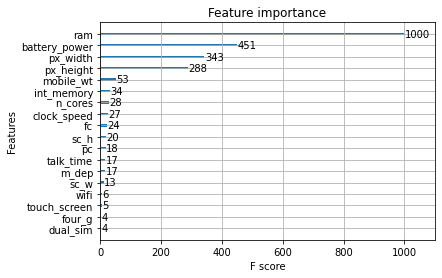

In [ ]:
from matplotlib import pyplot
from xgboost import plot_importance
plot_importance(model)
pyplot.show()

# Simple xb model

In [ ]:
train = xgb.DMatrix(data = X_train, label = Y_train)
test = xgb.DMatrix(data = X_test, label = Y_test)
param = {
    'max_depth': 25,
    'eta': 0.7,
    'objective': 'multi:softmax',
    'num_class' : 4
}
epochs = 500
model = xgb.train(param, train, epochs)

In [ ]:
predictions = model.predict(test)
accuracy_score(Y_test, predictions)

0.905

## Hyperparameter Tuning using GridSearchCV

In [ ]:
params = {
        'min_child_weight': [1, 5],
        'gamma': [0.5, 1, 2, 5],
        'subsample': [0.7,1.0],
        'colsample_bytree': [0.7, 1.0],
        'max_depth': [10, 25, 50],
        'n_estimators': [50, 100, 150]
        }

In [ ]:
combo = 1
for lis in params.values():
  print(len(lis))
  combo*=len(lis)

print(combo)

2
4
2
2
3
3
288


In [ ]:
125 * 5 * 6048

3780000

In [ ]:
def run_grid_search(estimator, params, X, Y, mode=1):
  if mode == 2:
    clf = GridSearchCV(estimator=estimator, param_grid=params, n_jobs=-1, verbose=3, scoring=['accuracy', 'roc_auc'], refit=False)
    clf.fit(X, Y)
  else:
    clf = GridSearchCV(estimator=estimator, param_grid=params, n_jobs=-1, verbose=3)
    clf.fit(X, Y)
  return clf


In [ ]:
clf = run_grid_search(estimator=XGBClassifier(), params=params, X=X_train, Y=Y_train, mode=1)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


In [ ]:
model = clf.best_estimator_
y_pred = model.predict(X_test)
print("Test Accuracy:", round(accuracy_score(Y_test, y_pred),2)*100)
print("Cross Validation Score(10 Splits):", cross_val_score(estimator = model, X = X_train, y = Y_train, cv = 10).mean())

Test Accuracy: 97.0
Cross Validation Score(10 Splits): 0.9690338164251207


In [ ]:
model = clf.best_estimator_
y_pred = model.predict(X_train)
print("train Accuracy:", round(accuracy_score(Y_train, y_pred),2)*100)
print("Cross Validation Score(10 Splits):", cross_val_score(estimator = model, X = X_train, y = Y_train, cv = 10).mean())

train Accuracy: 100.0
Cross Validation Score(10 Splits): 0.9690338164251207


In [ ]:
clf.best_params_

{'colsample_bytree': 0.6,
 'gamma': 0.5,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 100,
 'subsample': 0.6}